# Monte Carlo - Oscillating masses stabilization w/ input rate constraint

In [14]:
# problem definition
include("ex1_problem_data.jl");
# solver functions and variable containers
include("solver_suite.jl");

Scaling rows of H
Scaling components of g


In [15]:
# JuMP
jump.solver!(:mosek,false);

avg_nest_iter_count = 0.0
kmax_mc = 100

for j=1:kmax_mc
    # PIPG+
    pipg.reset_var!(:plus)
    pipg.solver!();

    # PIPG+ w/ restart
    pipg.reset_var!(:plus)
    pipg.solver_proxy!(pipg.z,pipg.v,pipg.w,pipg.κK,pipg.κu,pipg.κx,pipg.rd2o_restrt,
        pipg.rd2K_restrt,pipg.rfval_restrt,prb.restrt_idx)

    # PIPG affine eq.
    pipg.reset_var!(:eq)
    pipg.solver_eq!();
    
    # ADMM
    rival.reset_var!(:admm)
    rival.solver_admm!()
    
    # PDHG
    rival.reset_var!(:cp)
    rival.solver_cp!()
    
    data_mc.rd2o .= ((1-1/j) .* data_mc.rd2o) .+ (pipg.rd2o ./ j) 
    data_mc.rd2o_rst .= ((1-1/j) .* data_mc.rd2o_rst) .+ (pipg.rd2o_restrt ./ j) 
    data_mc.rd2o_eq .= ((1-1/j) .* data_mc.rd2o_eq) .+ (pipg.rd2o_eq ./ j) 
    data_mc.rd2o_admm .= ((1-1/j) .* data_mc.rd2o_admm) .+ (rival.rd2o ./ j) 
    data_mc.rd2o_cp .= ((1-1/j) .* data_mc.rd2o_cp) .+ (rival.rd2o_2 ./ j)
    
    data_mc.max_rd2o .= [max(data_mc.max_rd2o[k],abs(pipg.rd2o[k])) for k=1:prb.kmax]
    data_mc.max_rd2o_rst .= [max(data_mc.max_rd2o_rst[k],abs(pipg.rd2o_restrt[k])) for k=1:prb.kmax]
    data_mc.max_rd2o_eq .= [max(data_mc.max_rd2o_eq[k],abs(pipg.rd2o_eq[k])) for k=1:prb.kmax]
    data_mc.max_rd2o_admm .= [max(data_mc.max_rd2o_admm[k],abs(rival.rd2o[k])) for k=1:prb.kmax]
    data_mc.max_rd2o_cp .= [max(data_mc.max_rd2o_cp[k],abs(rival.rd2o_2[k])) for k=1:prb.kmax]
    
    data_mc.rd2K .= ((1-1/j) .* data_mc.rd2K) .+ (pipg.rd2K ./ j) 
    data_mc.rd2K_rst .= ((1-1/j) .* data_mc.rd2K_rst) .+ (pipg.rd2K_restrt ./ j) 
    data_mc.rd2K_eq .= ((1-1/j) .* data_mc.rd2K_eq) .+ (pipg.rd2K_eq ./ j) 
    data_mc.rd2K_admm .= ((1-1/j) .* data_mc.rd2K_admm) .+ (rival.rd2K ./ j) 
    data_mc.rd2K_cp .= ((1-1/j) .* data_mc.rd2K_cp) .+ (rival.rd2K_2 ./ j)
    
    data_mc.max_rd2K .= [max(data_mc.max_rd2K[k],abs(pipg.rd2K[k])) for k=1:prb.kmax]
    data_mc.max_rd2K_rst .= [max(data_mc.max_rd2K_rst[k],abs(pipg.rd2K_restrt[k])) for k=1:prb.kmax]
    data_mc.max_rd2K_eq .= [max(data_mc.max_rd2K_eq[k],abs(pipg.rd2K_eq[k])) for k=1:prb.kmax]
    data_mc.max_rd2K_admm .= [max(data_mc.max_rd2K_admm[k],abs(rival.rd2K[k])) for k=1:prb.kmax]
    data_mc.max_rd2K_cp .= [max(data_mc.max_rd2K_cp[k],abs(rival.rd2K_2[k])) for k=1:prb.kmax]
    
    avg_nest_iter_count = avg_nest_iter_count + sum(rival.nest_iter_count) ./ prb.kmax
end

avg_nest_iter_count = avg_nest_iter_count / kmax_mc
    
print("\n\nAverage Nesterov iterations in ADMM : $(avg_nest_iter_count)")

mosek termination status: OPTIMAL
PIPG+ relative distance to optimum: 1.131379870305041e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468300182406e-16
PIPGeq relative distance to optimum: 4.277767991833818e-14
ADMM relative distance to optimum: 1.8333468518691434e-16
Chambolle and Pock relative distance to optimum: 1.926907387236739e-8
PIPG+ relative distance to optimum: 1.1342210124763947e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468274418741e-16
PIPGeq relative distance to optimum: 3.9270862595414814e-14
ADMM relative distance to optimum: 1.8333468517940167e-16
Chambolle and Pock relative distance to optimum: 2.0261477265749105e-8
PIPG+ relative distance to optimum: 1.2350923131638495e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468304183252e-16
PIPGeq relative distance to optimum: 2.6008024958540964e-14
ADMM relative distance to optimum: 1.833346853509419e-16
Chambolle and Pock relative distance to optimum: 2.651446707228889e-8
PIPG+

Chambolle and Pock relative distance to optimum: 2.4537954979398812e-8
PIPG+ relative distance to optimum: 1.0336151479822525e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468259688835e-16
PIPGeq relative distance to optimum: 3.3809703205141076e-14
ADMM relative distance to optimum: 1.8333468501837137e-16
Chambolle and Pock relative distance to optimum: 2.1733113942159184e-8
PIPG+ relative distance to optimum: 1.1824111502463732e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468289049062e-16
PIPGeq relative distance to optimum: 6.660840910075507e-14
ADMM relative distance to optimum: 1.8333468503500196e-16
Chambolle and Pock relative distance to optimum: 1.965333292380444e-8
PIPG+ relative distance to optimum: 1.41728138605643e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468275159615e-16
PIPGeq relative distance to optimum: 1.4691178465871357e-14
ADMM relative distance to optimum: 1.8333468510060184e-16
Chambolle and Pock relative distance t

PIPGeq relative distance to optimum: 5.4300568523309465e-14
ADMM relative distance to optimum: 1.8333468509732148e-16
Chambolle and Pock relative distance to optimum: 2.296590956448498e-8
PIPG+ relative distance to optimum: 1.135343427411321e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468304126896e-16
PIPGeq relative distance to optimum: 3.11003631733127e-14
ADMM relative distance to optimum: 1.833346850021884e-16
Chambolle and Pock relative distance to optimum: 1.788585920006566e-8
PIPG+ relative distance to optimum: 1.1554007534148744e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468279579997e-16
PIPGeq relative distance to optimum: 3.519165450911949e-14
ADMM relative distance to optimum: 1.8333468499154527e-16
Chambolle and Pock relative distance to optimum: 2.1610154487404297e-8
PIPG+ relative distance to optimum: 1.2052624253853546e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468289141642e-16
PIPGeq relative distance to optimum: 1.89

PIPGeq relative distance to optimum: 3.388917702057836e-14
ADMM relative distance to optimum: 1.833346850136287e-16
Chambolle and Pock relative distance to optimum: 2.722092736416697e-8
PIPG+ relative distance to optimum: 1.193783712396285e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.8333468270778935e-16
PIPGeq relative distance to optimum: 4.145437958440605e-14
ADMM relative distance to optimum: 1.8333468543732048e-16
Chambolle and Pock relative distance to optimum: 2.361089609272455e-8
PIPG+ relative distance to optimum: 1.1067864564674848e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.833346830475722e-16
PIPGeq relative distance to optimum: 1.8994439550183852e-14
ADMM relative distance to optimum: 1.8333468505308357e-16
Chambolle and Pock relative distance to optimum: 1.496450759865236e-8
PIPG+ relative distance to optimum: 1.2113810576639697e-7
PIPG+ restarted w/ 40 relative distance to optimum: 1.833346829935736e-16
PIPGeq relative distance to optimum: 2.2374

In [16]:
using JLD

In [17]:
# save data
save("ex1_monte_carlo.jld","rd2o",data_mc.rd2o,"rd2o_rst",data_mc.rd2o_rst,"rd2o_eq",data_mc.rd2o_eq,
    "rd2o_admm",data_mc.rd2o_admm,"rd2o_cp",data_mc.rd2o_cp,"max_rd2o",data_mc.max_rd2o,"max_rd2o_rst",
    data_mc.max_rd2o_rst,"max_rd2o_eq",data_mc.max_rd2o_eq,"max_rd2o_admm",data_mc.max_rd2o_admm,"max_rd2o_cp",
    data_mc.max_rd2o_cp,"rd2K",data_mc.rd2K,"rd2K_rst",data_mc.rd2K_rst,"rd2K_eq",data_mc.rd2K_eq,"rd2K_admm",
    data_mc.rd2K_admm,"rd2K_cp",data_mc.rd2K_cp,"max_rd2K",data_mc.max_rd2K,"max_rd2K_rst",data_mc.max_rd2K_rst,
    "max_rd2K_eq",data_mc.max_rd2K_eq,"max_rd2K_admm",data_mc.max_rd2K_admm,"max_rd2K_cp",data_mc.max_rd2K_cp);

In [18]:
rd2o = load("ex1_monte_carlo.jld","rd2o")
rd2o_rst = load("ex1_monte_carlo.jld","rd2o_rst")
rd2o_eq = load("ex1_monte_carlo.jld","rd2o_eq")
rd2o_admm = load("ex1_monte_carlo.jld","rd2o_admm")
rd2o_cp  = load("ex1_monte_carlo.jld","rd2o_cp")

max_rd2o = load("ex1_monte_carlo.jld","max_rd2o")
max_rd2o_rst = load("ex1_monte_carlo.jld","max_rd2o_rst")
max_rd2o_eq = load("ex1_monte_carlo.jld","max_rd2o_eq")
max_rd2o_admm = load("ex1_monte_carlo.jld","max_rd2o_admm")
max_rd2o_cp  = load("ex1_monte_carlo.jld","max_rd2o_cp")

rd2K = load("ex1_monte_carlo.jld","rd2K")
rd2K_rst = load("ex1_monte_carlo.jld","rd2K_rst")
rd2K_eq = load("ex1_monte_carlo.jld","rd2K_eq")
rd2K_admm = load("ex1_monte_carlo.jld","rd2K_admm")
rd2K_cp  = load("ex1_monte_carlo.jld","rd2K_cp")

max_rd2K = load("ex1_monte_carlo.jld","max_rd2K")
max_rd2K_rst = load("ex1_monte_carlo.jld","max_rd2K_rst")
max_rd2K_eq = load("ex1_monte_carlo.jld","max_rd2K_eq")
max_rd2K_admm = load("ex1_monte_carlo.jld","max_rd2K_admm")
max_rd2K_cp  = load("ex1_monte_carlo.jld","max_rd2K_cp")

data_mc.set_rd2o_data!(rd2o,rd2o_rst,rd2o_eq,rd2o_admm,rd2o_cp,
    max_rd2o,max_rd2o_rst,max_rd2o_eq,max_rd2o_admm,max_rd2o_cp)

data_mc.set_rd2K_data!(rd2K,rd2K_rst,rd2K_eq,rd2K_admm,rd2K_cp,
    max_rd2K,max_rd2K_rst,max_rd2K_eq,max_rd2K_admm,max_rd2K_cp);

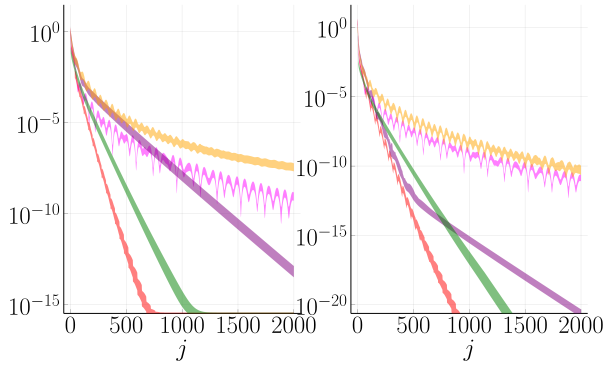

In [19]:
data_mc.plot_solstat()